In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import calendar as cd
from ipywidgets import widgets

In [2]:
df_gen = pd.read_csv("/kaggle/input/esports-earnings/GeneralEsportData.csv",encoding = 'ISO-8859-1')
df_hist = pd.read_csv("/kaggle/input/esports-earnings/HistoricalEsportData.csv",encoding = 'ISO-8859-1')

In [3]:
df_hist["year"] = pd.DatetimeIndex(df_hist["Date"]).year
df_all = df_hist.merge(df_gen[["Game","Genre"]], how = "left", on = "Game")
df_all = df_all.loc[(df_all["Earnings"]>0) & (df_all["Players"]>1) ]

In [4]:
df_pivot = pd.DataFrame()
df_pivot = pd.pivot_table(df_all,values=["Players","Earnings","Tournaments","Genre"], index=["Game","year"], \
                          aggfunc= {"Players":"sum","Earnings":"sum","Tournaments":"sum","Genre":"first"})
df_pivot.reset_index(inplace=True)

In [5]:
print("Total dataset:",df_all.shape)
print("Pivot dataset:",df_pivot.shape)

Total dataset: (6853, 7)
Pivot dataset: (1529, 6)


In [6]:
print("Total no of games: ",df_all["Game"].nunique())
print("--------------------------------------------------------------------------------------------------")
df_all.info()
print("--------------------------------------------------------------------------------------------------")

Total no of games:  482
--------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6853 entries, 0 to 7341
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         6853 non-null   object 
 1   Game         6853 non-null   object 
 2   Earnings     6853 non-null   float64
 3   Players      6853 non-null   int64  
 4   Tournaments  6853 non-null   int64  
 5   year         6853 non-null   int64  
 6   Genre        6853 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 428.3+ KB
--------------------------------------------------------------------------------------------------


In [7]:
print(df_all.columns)
print("--------------------------------------------------------------------------------------------------")
print(df_all["Genre"].unique())
print("--------------------------------------------------------------------------------------------------")

Index(['Date', 'Game', 'Earnings', 'Players', 'Tournaments', 'year', 'Genre'], dtype='object')
--------------------------------------------------------------------------------------------------
['First-Person Shooter' 'Strategy' 'Sports'
 'Multiplayer Online Battle Arena' 'Fighting Game' 'Racing'
 'Role-Playing Game' 'Third-Person Shooter' 'Collectible Card Game'
 'Puzzle Game' 'Battle Royale']
--------------------------------------------------------------------------------------------------


In [8]:
df_all.head(20)

,Date,Game,Earnings,Players,Tournaments,year,Genre
0,1998-01-01,QuakeWorld,15000.00,8,1,1998,First-Person Shooter
1,1998-05-01,Quake II,14600.00,4,1,1998,First-Person Shooter
2,1998-07-01,Quake II,15000.00,5,1,1998,First-Person Shooter
3,1998-07-01,QuakeWorld,6500.00,4,1,1998,First-Person Shooter
4,1998-11-01,Quake II,36600.00,13,2,1998,First-Person Shooter
6,1998-11-01,StarCraft: Brood War,20000.00,8,1,1998,Strategy
8,1999-03-01,Quake II,15000.00,5,1,1999,First-Person Shooter
9,1999-04-01,StarCraft: Brood War,3000.00,2,1,1999,Strategy
10,1999-05-01,Quake II,27400.00,8,1,1999,First-Person Shooter
11,1999-05-01,StarCraft: Brood War,27400.00,8,1,1999,Strategy


In [9]:
df_pivot.sort_values('year')

,Game,year,Earnings,Genre,Players,Tournaments
933,Quake II,1998,66200.00,First-Person Shooter,22,4
1100,StarCraft: Brood War,1998,20000.00,Strategy,8,1
963,QuakeWorld,1998,21500.00,First-Person Shooter,12,2
939,Quake III Arena,1999,43200.00,First-Person Shooter,18,2
934,Quake II,1999,42400.00,First-Person Shooter,13,2
...,...,...,...,...,...,...
681,League of Legends: Wild Rift,2021,1024288.00,Multiplayer Online Battle Arena,241,4
680,League of Legends,2021,7678925.04,Multiplayer Online Battle Arena,2077,88
668,Koihime Enbu,2021,100.00,Fighting Game,3,1
724,Maiden & Spell,2021,125.00,Fighting Game,3,1


# <p style="text-align:center">Year vs Tournaments / Earnings / Players</p>

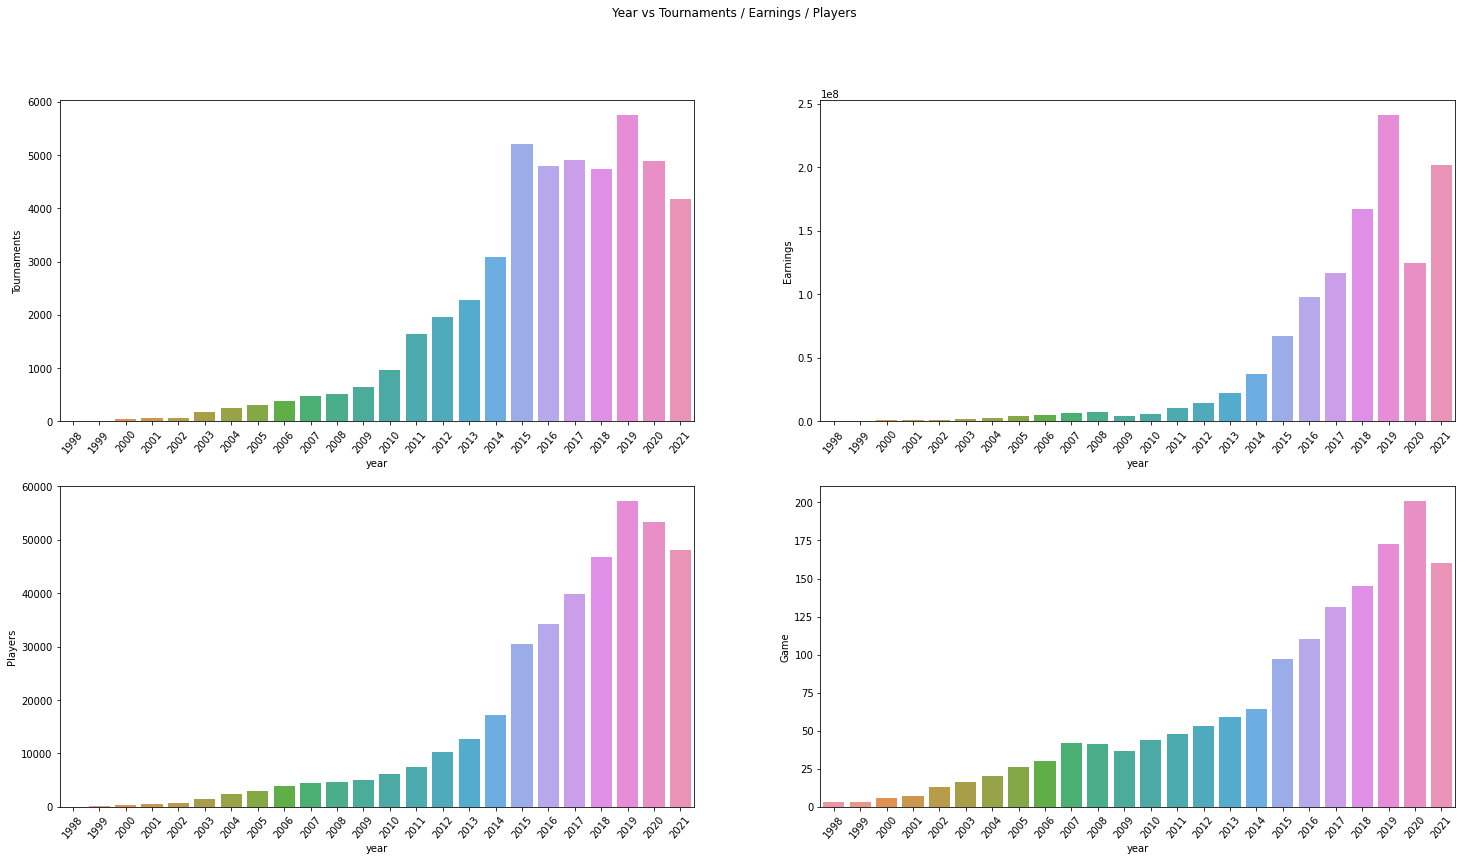

In [10]:
sample = df_pivot[["year","Tournaments","Earnings","Players"]].groupby("year").sum()
sample1 = df_pivot[["Game","year"]].groupby("year").count()
fig, ax = plt.subplots(2,2,figsize = (25,13))
sns.barplot(x=sample.index,y=sample.Tournaments,ax=ax[0][0]).tick_params('x',rotation=50)
sns.barplot(x=sample.index,y=sample.Earnings,ax=ax[0][1]).tick_params('x',rotation=50)
sns.barplot(x=sample.index,y=sample.Players,ax=ax[1][0]).tick_params('x',rotation=50)
sns.barplot(x= sample1.index, y=sample1.Game,ax=ax[1][1]).tick_params('x',rotation=50)
fig.suptitle("Year vs Tournaments / Earnings / Players")
fig.show()

In `2020`, earnings dropped nearly to **50%** of previous year's earnings but the other parameters didn't fall off unlike earnings, whereas in case of `no. of games` entered the esports has increased by **16%** of previous year's. In `2021`, it's quite the opposite of what happened at `2020`, every parameters kept to fall except `earnings` which had **62%** increase of previous year's.

### Comparison using line graph:

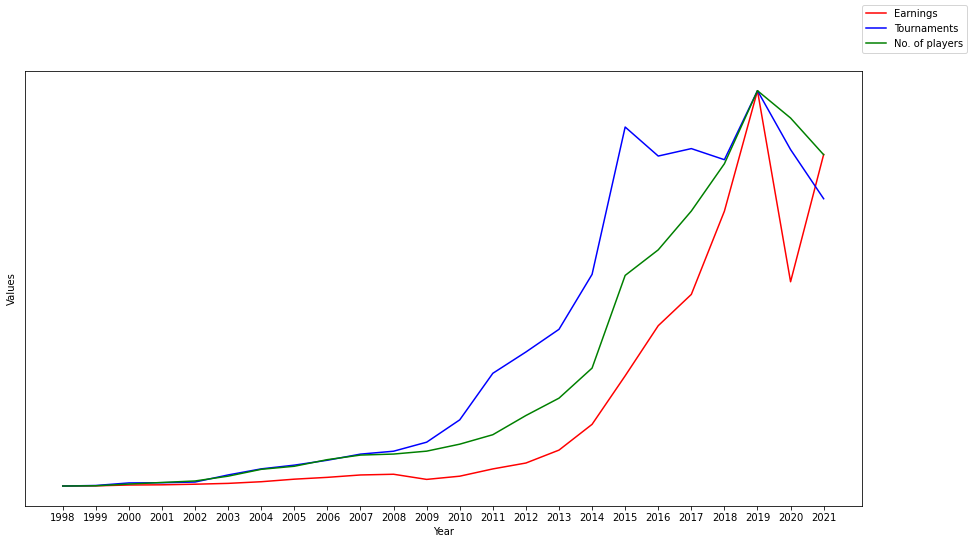

In [11]:
fig,ax = plt.subplots(figsize=(15,8))
ax1 = fig.add_axes(ax.get_position())
ax2 = fig.add_axes(ax.get_position())

ax.plot(sample.index,sample.Earnings,color='red')
ax1.plot(sample.index,sample.Tournaments,color='blue')
ax2.plot(sample.index,sample.Players,color='green')

for axs in fig.axes[1:]:
    axs.set_frame_on(False)
    axs.set_axis_off()
    
ax.set_yticks([])
ax.set_xticks(sample.index)
ax.set_ylabel('Values')
ax.set_xlabel('Year')

fig.legend(labels=['Earnings','Tournaments','No. of players'],fontsize='medium')
fig.show()

&emsp;&emsp;&emsp;&emsp;&emsp; In this graph it's well clearly seen that `earnings` had a steep downfall at `2020` whereas other two parameters had a gradual fall.

# <p style="text-align:center"> Which genre is popular in Esports?</p>

In [12]:
df_genre_pivot= pd.pivot_table(df_all[["Game","year","Genre"]],index = ["year","Genre"],values="Game",aggfunc="count").reset_index()
df_genre_pivot.rename(columns= {"Game":"Count"},inplace=True)

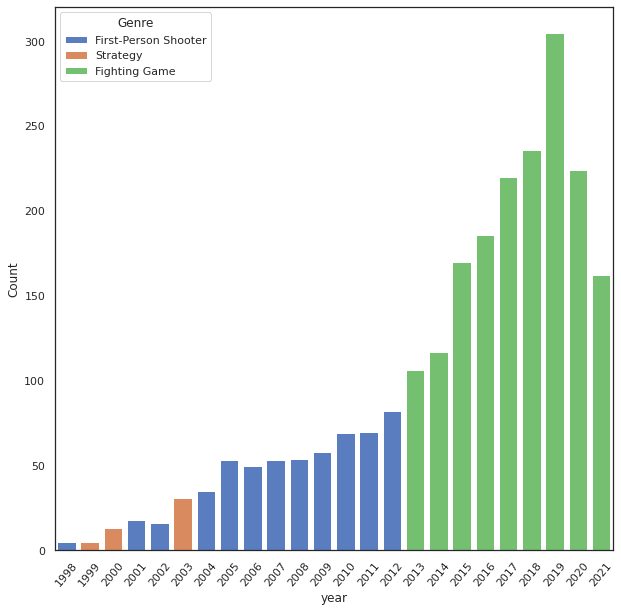

In [13]:
df_genre_max = df_genre_pivot.loc[df_genre_pivot.groupby("year")["Count"].idxmax()]
sns.set_theme(rc = {'figure.figsize':(10,10)},style="white",palette = "muted")
ax = sns.barplot(data = df_genre_max,x="year",y="Count",hue="Genre",dodge=False)
ax.set_xticklabels(labels= ax.get_xticklabels(), rotation=50)
plt.show()

The genre trend is quite interesting to me. As it looks like `FPS` and `Fighting` games dominated the Esports.

P.S.- I thought fighting games were popular in early 20s 🙃

# <p style="text-align:center"> Top 10 earned Games</p>

In [14]:
df_top_10 = df_pivot[["Game","Earnings","Players","Tournaments"]].groupby("Game").sum().sort_values("Earnings",ascending = False).head(10)
df_top_10["Earnings"] = round(df_top_10["Earnings"]/1000000)
df_top_10["Players"] = round(df_top_10["Players"]/1000)
df_top_10.reset_index(inplace=True)

In [15]:
df_top_10

,Game,Earnings,Players,Tournaments
0,Dota 2,277.0,24.0,1578
1,Counter-Strike: Global Offensive,129.0,75.0,6053
2,Fortnite,111.0,15.0,748
3,League of Legends,90.0,34.0,2665
4,PLAYERUNKNOWNS BATTLEGROUNDS,43.0,11.0,387
5,Arena of Valor,41.0,2.0,72
6,StarCraft II,36.0,18.0,6280
7,Overwatch,32.0,13.0,765
8,PLAYERUNKNOWN'S BATTLEGROUNDS Mobile,28.0,4.0,73
9,Hearthstone,27.0,8.0,947


/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


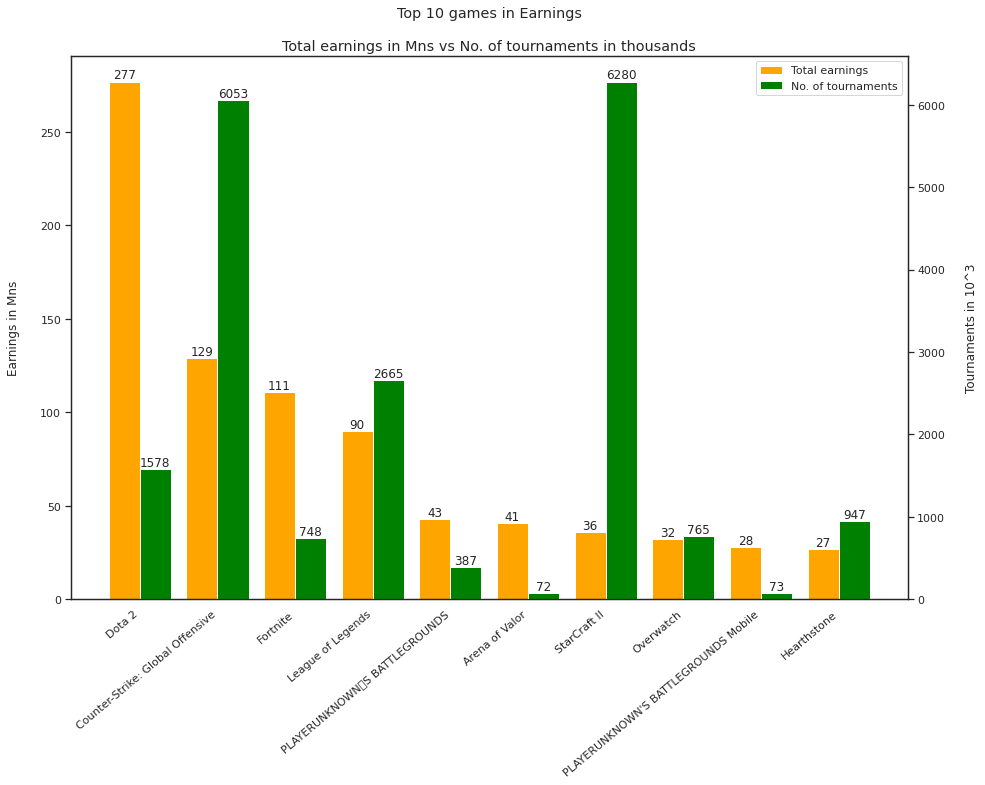

In [16]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()

ln1=ax1.bar(data = df_top_10, x=np.arange(20,step=2)-0.4,height="Earnings",width = 0.8,color='orange',label='Total earnings')
ln2=ax2.bar(data = df_top_10, x=np.arange(20,step=2)+0.4,height="Tournaments", width = 0.8, color='green',label='No. of tournaments')

ax1.tick_params('x',rotation = 40)
ax1.set_xticks(ticks = np.arange(20,step=2),labels= df_top_10['Game'], horizontalalignment = 'right')
ax1.set_ylabel('Earnings in Mns',labelpad=20)
ax2.set_ylabel('Tournaments in 10^3',labelpad=20)
ax1.legend(handles=[ln1,ln2])
ax1.bar_label(ln1)
ax2.bar_label(ln2)
plt.title('Top 10 games in Earnings\n\nTotal earnings in Mns vs No. of tournaments in thousands',fontsize='large')
plt.show()

# <p style="text-align:center"> Most earned games with genre each year </p>

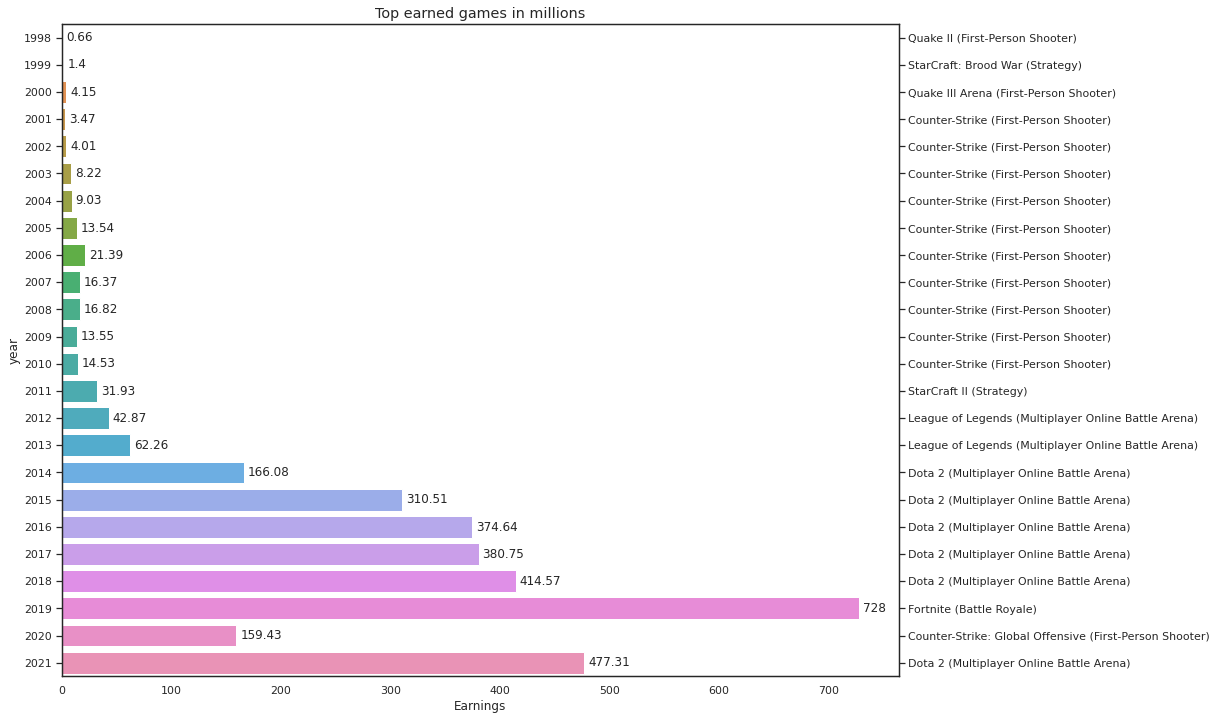

In [17]:
df_top_games = df_pivot.sort_values("Earnings",ascending=False).groupby(["year"],as_index=False).agg({"Earnings":"max","Game":"first","Genre":"first"})
df_top_games["Earnings"]=(df_top_games["Earnings"]/100000).round(2)

sns.set_theme(rc={'figure.figsize':(15,12)},style="white")

ax=sns.barplot(x=df_top_games.Earnings,y=df_top_games.year,orient='h',)
ax1=ax.twinx()
ax.bar_label(ax.containers[0],padding=4)
ax1.set_yticks(ticks= ax.get_yticks(), labels= df_top_games["Game"] +" ("+df_top_games["Genre"]+")")
ax1.set_ylim(ax.get_ylim())

ax.set_title("Top earned games in millions",fontsize='large')

plt.show()

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;In above graph, we can see that at `2020` the highest earnings is nearly equal to the highest earnings **6** years before.

# <p style="text-align:center"> Month-wise total earnings and no. of tournaments (1998-2021) </p>

In [18]:
df_monthly_earnings = df_all[["Date","Earnings"]].groupby(pd.DatetimeIndex(df_all["Date"]).month).sum()
df_monthly_earnings.index.names=["Month"]

df_monthly_tourn = df_all[["Date","Tournaments"]].groupby(pd.DatetimeIndex(df_all["Date"]).month).sum()
df_monthly_tourn.index.names=["Month"]


In [19]:
df_monthly_earnings

,Earnings
Month,
1,4.488701e+07
2,3.707876e+07
3,6.888739e+07
4,7.085714e+07
5,7.376993e+07
6,8.048304e+07
7,1.170489e+08
8,2.191993e+08
9,7.833628e+07


In [20]:
df_monthly_tourn

,Tournaments
Month,
1,3102
2,3236
3,3881
4,4088
5,4186
6,4062
7,4086
8,4272
9,3787


In [21]:
fig=make_subplots(rows=1,cols=2)
colors=px.colors.qualitative.Set3

for axs, row in df_monthly_earnings.iterrows():
    fig.add_trace(go.Bar(x=['Earnings'],y=[row['Earnings']], marker=dict(color=colors[axs-1]),name=cd.month_abbr[axs],showlegend=False),row=1,col=1)

for axs, row in df_monthly_tourn.iterrows():
    fig.add_trace(go.Bar(x=['No. of tournaments'],y=[row['Tournaments']], marker=dict(color=colors[axs-1]),name=cd.month_abbr[axs]),row=1,col=2)

fig.update_layout(barmode='stack',width=750,height=600,template="plotly_white",title={'text':'Total earnings and no. of tournaments month-wise','x':0.5}\
                  ,yaxis=dict(title_text='Values'),legend_title='Months',legend_traceorder="normal")

From above, we can conclude that in a year,`August` is when most of the earnings are earned and `Feburary` takes the last place. Interestingly, no. of tournaments in a year is more or less equally distributed throughout the year.